In [1]:
%matplotlib inline

In [2]:
import nltk

In [3]:
from nltk.corpus import treebank

In [4]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]

In [5]:
print(t)
# (S
#   (NP-SBJ
#     (NP (NNP Pierre) (NNP Vinken))
#     (, ,)
#     (ADJP (NP (CD 61) (NNS years)) (JJ old))
#     (, ,))
#   (VP
#     (MD will)
#     (VP
#       (VB join)
#       (NP (DT the) (NN board))
#       (PP-CLR
#         (IN as)
#         (NP (DT a) (JJ nonexecutive) (NN director)))
#       (NP-TMP (NNP Nov.) (CD 29))))
#   (. .))

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


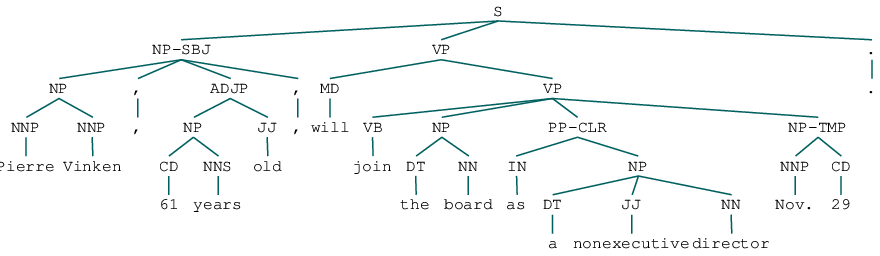

In [6]:
t

In [7]:
def filter(tree):
    child_nodes = [child.label() for child in tree
                   if isinstance(child, nltk.Tree)]
    return  (tree.label() == 'VP') and ('S' in child_nodes)

In [8]:
from nltk.corpus import treebank

In [9]:
[subtree for tree in treebank.parsed_sents()
         for subtree in tree.subtrees(filter)]
#  [Tree('VP', [Tree('VBN', ['named']), Tree('S', [Tree('NP-SBJ', ...]), ...]), ...]

[Tree('VP', [Tree('VBN', ['named']), Tree('S', [Tree('NP-SBJ', [Tree('-NONE-', ['*-1'])]), Tree('NP-PRD', [Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('DT', ['this']), Tree('JJ', ['British']), Tree('JJ', ['industrial']), Tree('NN', ['conglomerate'])])])])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree(',', [',']), Tree('``', ['``']), Tree('S', [Tree('NP-SBJ', [Tree('DT', ['This'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('DT', ['an']), Tree('JJ', ['old']), Tree('NN', ['story'])])])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])]),
 Tree('VP', [Tree('VBN', ['expected']), Tree('S', [Tree('-NONE-', ['*?*'])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])]),
 Tree('VP', [Tree('VBZ', ['appears']), Tree('S', [Tree('NP-SBJ', [Tree('-NONE-', ['*-1'])]), Tree('VP', [Tree('TO', ['to']), Tree('VP', [Tree('VB', ['be']), Tree('

In [10]:
from collections import defaultdict

In [11]:
entries = nltk.corpus.ppattach.attachments('training')

In [12]:
table = defaultdict(lambda: defaultdict(set))

In [13]:
for entry in entries:
    key = entry.noun1 + '-' + entry.prep + '-' + entry.noun2
    table[key][entry.attachment].add(entry.verb)

In [14]:
for key in sorted(table):
    if len(table[key]) > 1:
        print(key, 'N:', sorted(table[key]['N']), 'V:', sorted(table[key]['V']))

%-below-level N: ['left'] V: ['be']
%-from-year N: ['was'] V: ['declined', 'dropped', 'fell', 'grew', 'increased', 'plunged', 'rose', 'was']
%-in-August N: ['was'] V: ['climbed', 'fell', 'leaping', 'rising', 'rose']
%-in-September N: ['increased'] V: ['climbed', 'declined', 'dropped', 'edged', 'fell', 'grew', 'plunged', 'rose', 'slipped']
%-in-week N: ['declined'] V: ['was']
%-to-% N: ['add', 'added', 'backed', 'be', 'cut', 'go', 'grow', 'increased', 'increasing', 'is', 'offer', 'plummet', 'reduce', 'rejected', 'rise', 'risen', 'shaved', 'wants', 'yield', 'zapping'] V: ['fell', 'rise', 'slipped']
%-to-million N: ['declining'] V: ['advanced', 'climbed', 'cutting', 'declined', 'declining', 'dived', 'dropped', 'edged', 'fell', 'gained', 'grew', 'increased', 'jump', 'jumped', 'plunged', 'rising', 'rose', 'slid', 'slipped', 'soared', 'tumbled']
1-to-21 N: ['dropped'] V: ['dropped']
1-to-33 N: ['gained'] V: ['dropped', 'fell', 'jumped']
1-to-4 N: ['added'] V: ['gained']
1-to-47 N: ['jumped']

In [15]:
nltk.corpus.sinica_treebank.parsed_sents()[3450].draw()

In [16]:
grammar = nltk.CFG.fromstring("""
S -> NP V NP
NP -> NP Sbar
Sbar -> NP V
NP -> 'fish'
V -> 'fish'
""")

In [17]:
tokens = ["fish"] * 5

In [18]:
cp = nltk.ChartParser(grammar)

In [19]:
for tree in cp.parse(tokens):
    print(tree)
# (S (NP fish) (V fish) (NP (NP fish) (Sbar (NP fish) (V fish))))
# (S (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish) (NP fish))

(S (NP fish) (V fish) (NP (NP fish) (Sbar (NP fish) (V fish))))
(S (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish) (NP fish))


In [20]:
def give(t):
    return t.label() == 'VP' and len(t) > 2 and t[1].label() == 'NP'\
           and (t[2].label() == 'PP-DTV' or t[2].label() == 'NP')\
           and ('give' in t[0].leaves() or 'gave' in t[0].leaves())
def sent(t):
    return ' '.join(token for token in t.leaves() if token[0] not in '*-0')
def print_node(t, width):
        output = "%s %s: %s / %s: %s" %\
            (sent(t[0]), t[1].label(), sent(t[1]), t[2].label(), sent(t[2]))
        if len(output) > width:
            output = output[:width] + "..."
        print(output)

In [21]:
for tree in nltk.corpus.treebank.parsed_sents():
    for t in tree.subtrees(give):
        print_node(t, 72)
# gave NP: the chefs / NP: a standing ovation
# give NP: advertisers / NP: discounts for maintaining or increasing ad sp...
# give NP: it / PP-DTV: to the politicians
# gave NP: them / NP: similar help
# give NP: them / NP:
# give NP: only French history questions / PP-DTV: to students in a Europe...
# give NP: federal judges / NP: a raise
# give NP: consumers / NP: the straight scoop on the U.S. waste crisis
# gave NP: Mitsui / NP: access to a high-tech medical product
# give NP: Mitsubishi / NP: a window on the U.S. glass industry
# give NP: much thought / PP-DTV: to the rates she was receiving , nor to ...
# give NP: your Foster Savings Institution / NP: the gift of hope and free...
# give NP: market operators / NP: the authority to suspend trading in futu...
# gave NP: quick approval / PP-DTV: to $ 3.18 billion in supplemental appr...
# give NP: the Transportation Department / NP: up to 50 days to review any...
# give NP: the president / NP: such power
# give NP: me / NP: the heebie-jeebies
# give NP: holders / NP: the right , but not the obligation , to buy a cal...
# gave NP: Mr. Thomas / NP: only a `` qualified '' rating , rather than ``...
# give NP: the president / NP: line-item veto power

gave NP: the chefs / NP: a standing ovation
give NP: advertisers / NP: discounts for maintaining or increasing ad sp...
give NP: it / PP-DTV: to the politicians
gave NP: them / NP: similar help
give NP: them / NP: 
give NP: only French history questions / PP-DTV: to students in a Europe...
give NP: federal judges / NP: a raise
give NP: consumers / NP: the straight scoop on the U.S. waste crisis
gave NP: Mitsui / NP: access to a high-tech medical product
give NP: Mitsubishi / NP: a window on the U.S. glass industry
give NP: much thought / PP-DTV: to the rates she was receiving , nor to ...
give NP: your Foster Savings Institution / NP: the gift of hope and free...
give NP: market operators / NP: the authority to suspend trading in futu...
gave NP: quick approval / PP-DTV: to $ 3.18 billion in supplemental appr...
give NP: the Transportation Department / NP: up to 50 days to review any...
give NP: the president / NP: such power
give NP: me / NP: the heebie-jeebies
give NP: holders / NP: 

In [22]:
grammar = nltk.PCFG.fromstring("""
    S    -> NP VP              [1.0]
    VP   -> TV NP              [0.4]
    VP   -> IV                 [0.3]
    VP   -> DatV NP NP         [0.3]
    TV   -> 'saw'              [1.0]
    IV   -> 'ate'              [1.0]
    DatV -> 'gave'             [1.0]
    NP   -> 'telescopes'       [0.8]
    NP   -> 'Jack'             [0.2]
    """)

In [23]:
print(grammar)
# Grammar with 9 productions (start state = S)
#     S -> NP VP [1.0]
#     VP -> TV NP [0.4]
#     VP -> IV [0.3]
#     VP -> DatV NP NP [0.3]
#     TV -> 'saw' [1.0]
#     IV -> 'ate' [1.0]
#     DatV -> 'gave' [1.0]
#     NP -> 'telescopes' [0.8]
#     NP -> 'Jack' [0.2]

Grammar with 9 productions (start state = S)
    S -> NP VP [1.0]
    VP -> TV NP [0.4]
    VP -> IV [0.3]
    VP -> DatV NP NP [0.3]
    TV -> 'saw' [1.0]
    IV -> 'ate' [1.0]
    DatV -> 'gave' [1.0]
    NP -> 'telescopes' [0.8]
    NP -> 'Jack' [0.2]


In [24]:
viterbi_parser = nltk.ViterbiParser(grammar)

In [25]:
for tree in viterbi_parser.parse(['Jack', 'saw', 'telescopes']):
    print(tree)
# (S (NP Jack) (VP (TV saw) (NP telescopes))) (p=0.064)

(S (NP Jack) (VP (TV saw) (NP telescopes))) (p=0.064)
